In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', size = 12)


health = pd.read_csv('Healthcare_data_updated.csv', header = 0)  #this is the updated file with the more useable Age_Category

#get basic info on this df
print(health.shape)
print(list(health.columns))

#One column has a comma in the middle of its name so I altered that col name (it was causing problems when I plotted)
health=health.rename(columns = {'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'})


(3424, 71)
['Unnamed: 0', 'Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Category', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_

In [19]:
#the data is unbalanced between the two possible values for Persistency_Flag - this will be dealt with later when applying the ML classification algorithm
health['Persistency_Flag'].value_counts()



Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

3    1438
2    1086
1     733
0     167
Name: Age_Category, dtype: int64

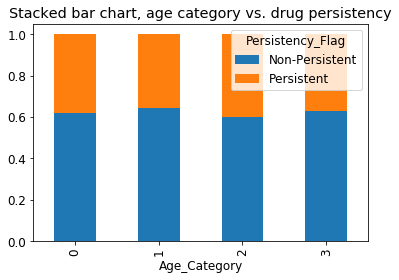

In [20]:
#I created bar charts to do a visual check for any possible relationship between a variable (column) and the target drug persistency variable
#Even if the bar chart indicates a relationship, if the numbers are too skewed it might not be helpful, so I also printed out value counts for that indep variable


table = pd.crosstab(health.Age_Category, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, age category vs. drug persistency')
#age category does not seem a strong predictor for drug persistency
health['Age_Category'].value_counts()

#No evident information from this independent variable (it sheds little or no light on persistency based on the bar chart)


N    3357
Y      67
Name: Risk_Excessive_Thinness, dtype: int64

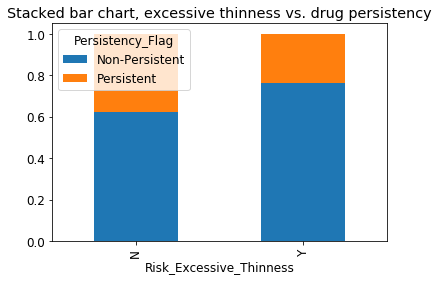

In [21]:
table = pd.crosstab(health.Risk_Excessive_Thinness, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, excessive thinness vs. drug persistency')
health['Risk_Excessive_Thinness'].value_counts()
#excessive thinness seems a slightly better predictor but the numbers are skewed (so not so helpful)

N    2522
Y     902
Name: Gluco_Record_During_Rx, dtype: int64

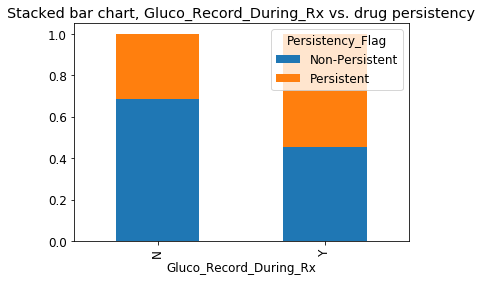

In [15]:
table = pd.crosstab(health.Gluco_Record_During_Rx, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, Gluco_Record_During_Rx vs. drug persistency')
health['Gluco_Record_During_Rx'].value_counts()


Others        2013
Specialist    1411
Name: Ntm_Specialist_Flag, dtype: int64

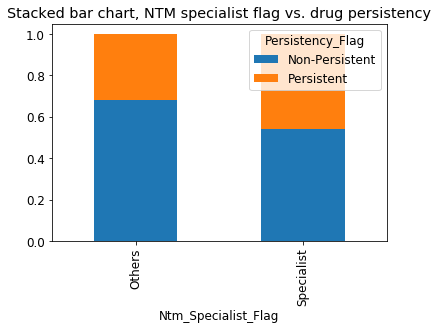

In [11]:

table = pd.crosstab(health.Ntm_Specialist_Flag, health.Persistency_Flag)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
plt.title('Stacked bar chart, NTM specialist flag vs. drug persistency')
health['Ntm_Specialist_Flag'].value_counts()




In [12]:
#Now to check all the variables:
#first create list for demographic variables
#then create lists for clinical variables

#including age_category and not the other, age_bucket
list1 = health.columns[3:8]
list2 = health.columns[9:12]
demographic = list1.to_list() + list2.to_list() #the produced list1, list2 were series so I converted to list format



#I similarly created three clinical lists
list3 = health.columns[12:26]
clinical1 = list3.to_list()
list4 = health.columns[26:50]
clinical2 = list4.to_list()
list5 = health.columns[50:71]
clinical3 = list5.to_list()


Female    3230
Male       194
Name: Gender, dtype: int64
---
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
---
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
---
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
---
3    1438
2    1086
1     733
0     167
Name: Age_Category, dtype: int64
---
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             3

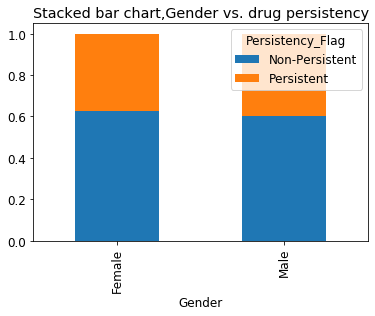

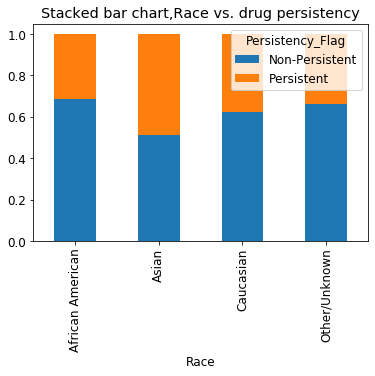

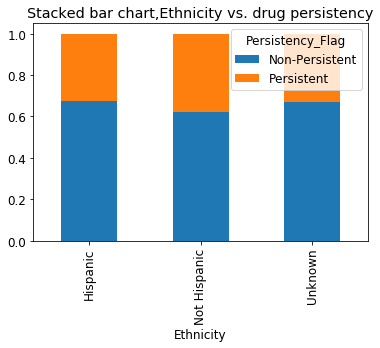

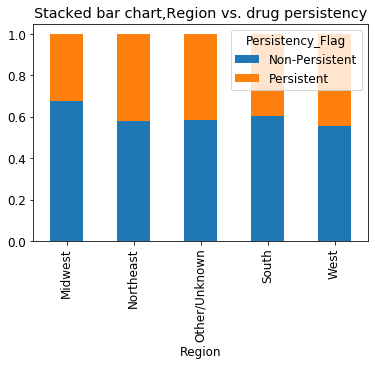

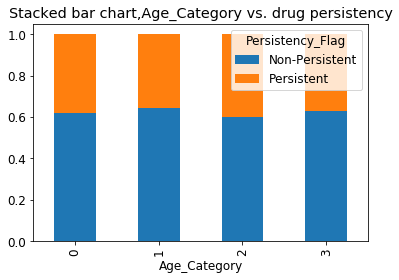

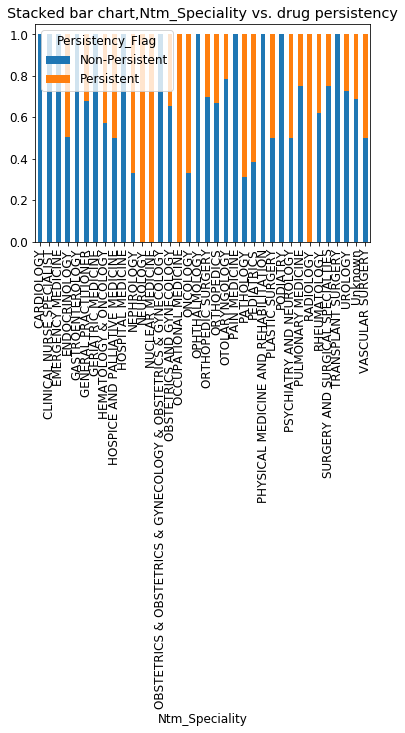

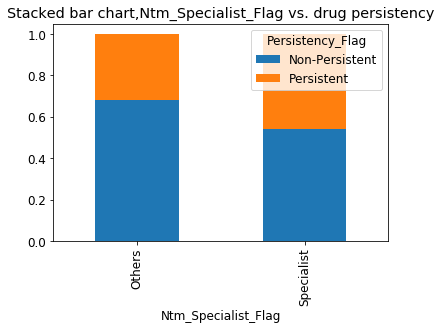

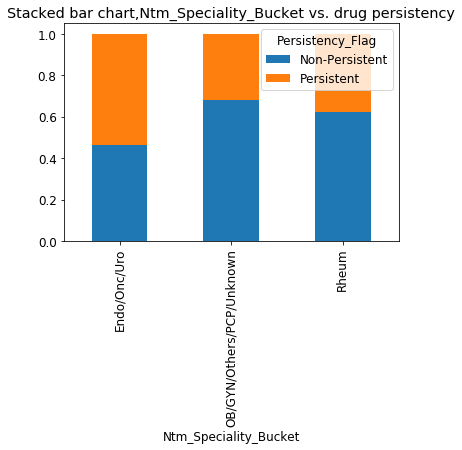

In [22]:

#using a loop, look at all the independent demographic variables against the dependent variable drug persistency
for item in demographic:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')
    

N    2619
Y     805
Name: Gluco_Record_Prior_Ntm, dtype: int64
---
N    2522
Y     902
Name: Gluco_Record_During_Rx, dtype: int64
---
0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
17        7
30        7
21        7
28        7
36        5
19        3
32        3
34        3
42        3
25        2
39        2
58        2
52        2
48        2
88        2
38        1
81        1
40        1
146       1
45        1
37        1
35        1
33        1
29        1
27        1
23        1
118       1
44        1
110       1
108       1
72        1
68        1
69        1
54        1
50        1
66        1
Name: Dexa_Freq_During_Rx, dtype: int64
---
N    2488
Y     936
Name: Dexa_During_Rx, dtype: int64
---
N    2872
Y     552
Name: Frag_Frac_Prior_Ntm, dtype: int64
---
N  

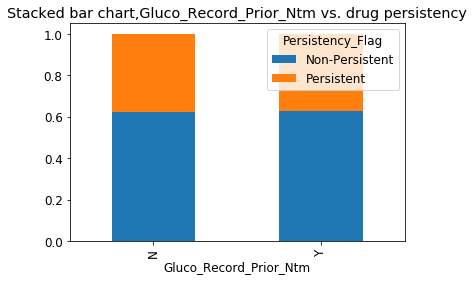

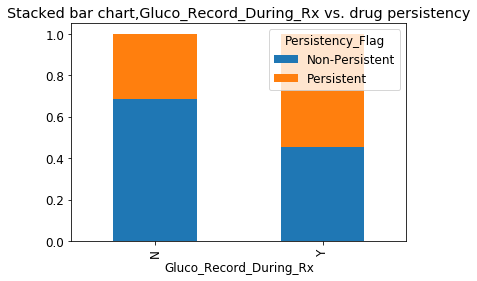

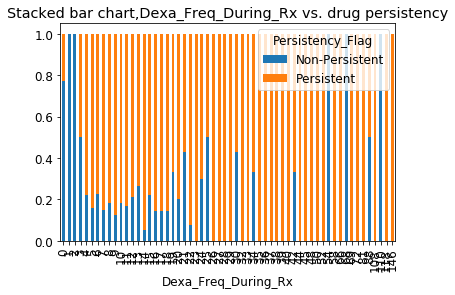

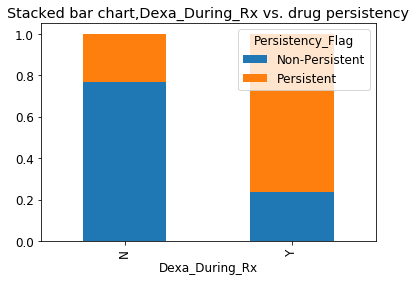

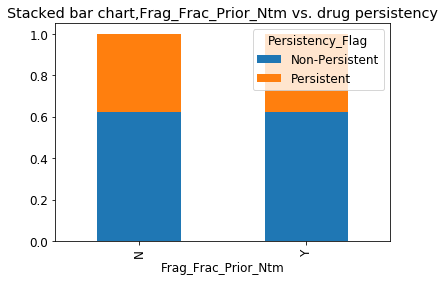

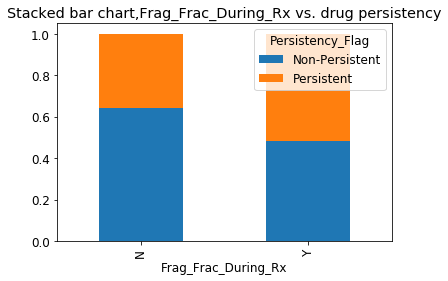

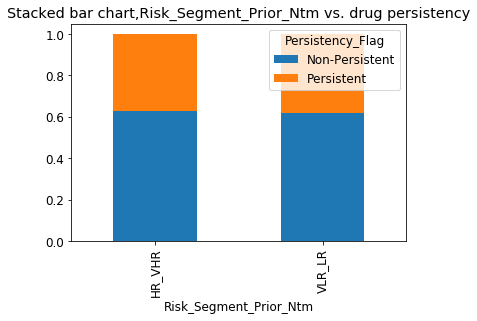

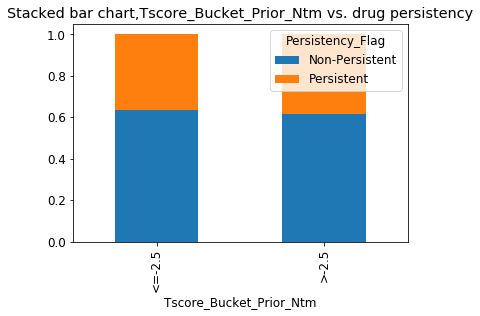

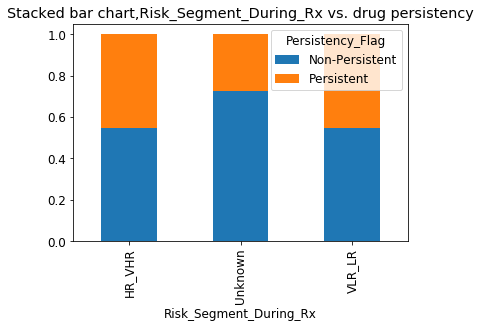

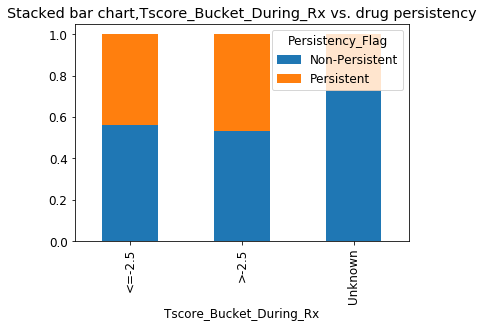

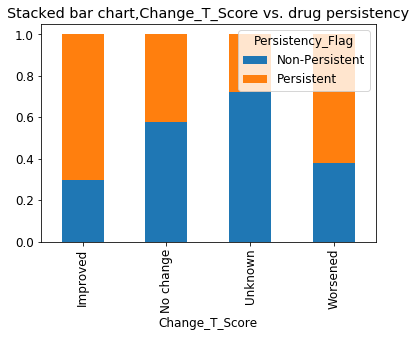

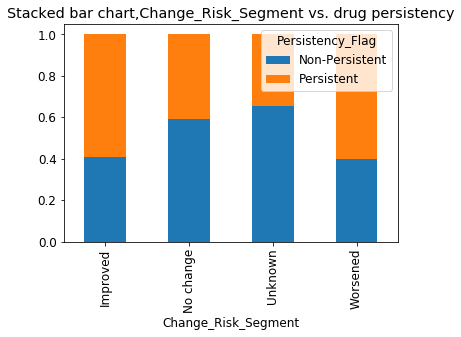

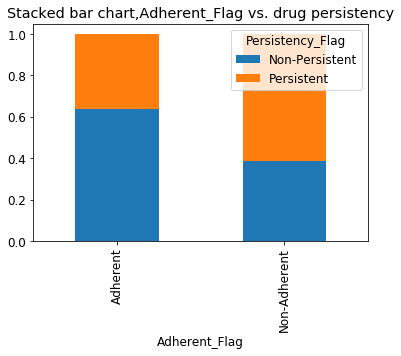

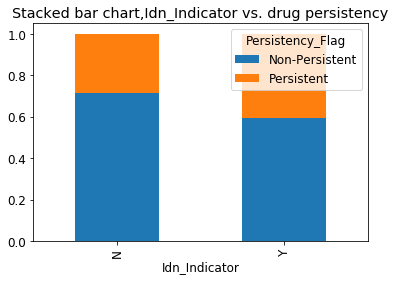

In [23]:
#look at the first list of clinical variables against the dependent variable drug persistency

for item in clinical1:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')

Y    3056
N     368
Name: Injectable_Experience_During_Rx, dtype: int64
---
N    1891
Y    1533
Name: Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, dtype: int64
---
N    1911
Y    1513
Name: Comorb_Encounter_For_Immunization, dtype: int64
---
N    2072
Y    1352
Name: Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx, dtype: int64
---
N    2331
Y    1093
Name: Comorb_Vitamin_D_Deficiency, dtype: int64
---
N    2425
Y     999
Name: Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, dtype: int64
---
N    2633
Y     791
Name: Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, dtype: int64
---
N    2607
Y     817
Name: Comorb_Long_Term_Current_Drug_Therapy, dtype: int64
---
N    2645
Y     779
Name: Comorb_Dorsalgia, dtype: int64
---
N    2747
Y     677
Name: Comorb_Personal_History_Of_Other_Diseases_And_Conditions, dtype: int64
---
N    2906
Y     518
Name: Comorb_Other_Disorders_Of_Bone_Density_And_Structure, dtype: int64
---
Y    1765
N    1659

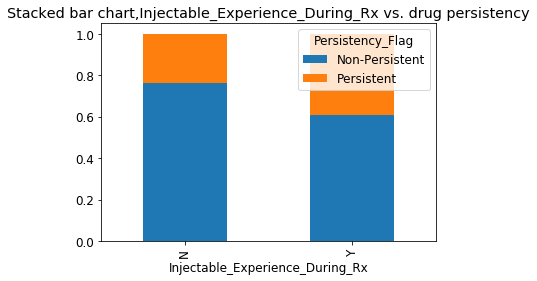

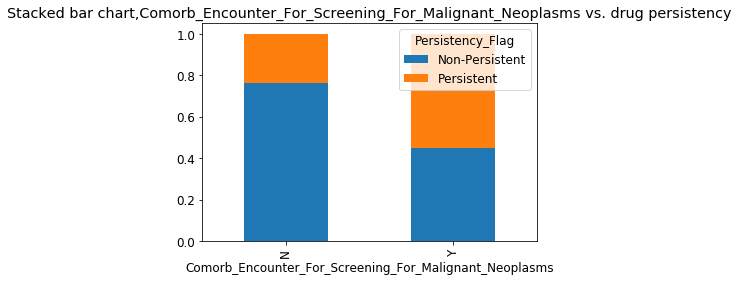

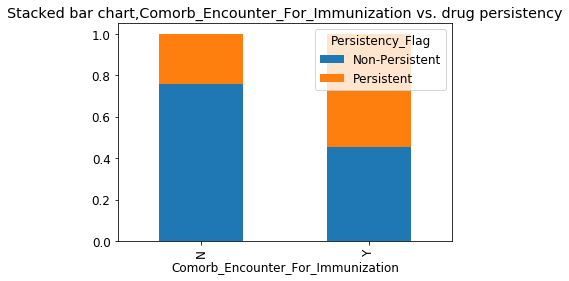

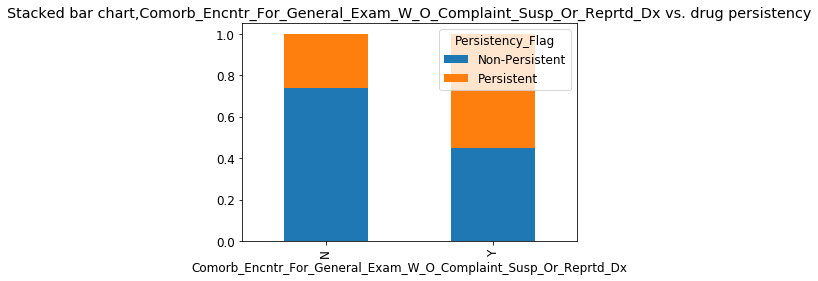

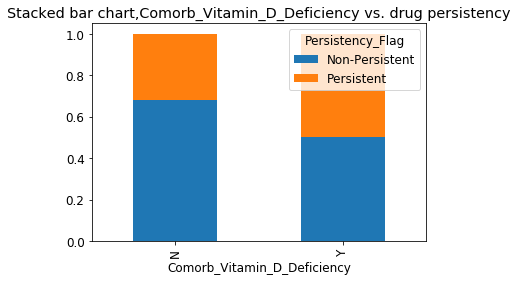

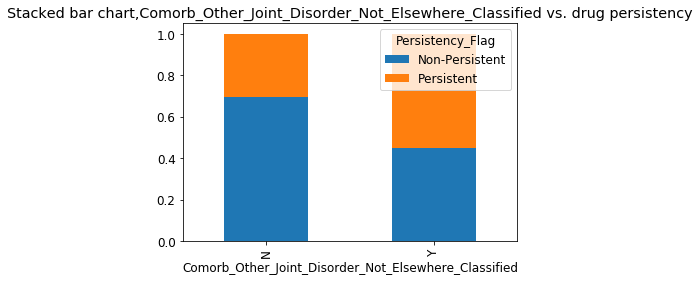

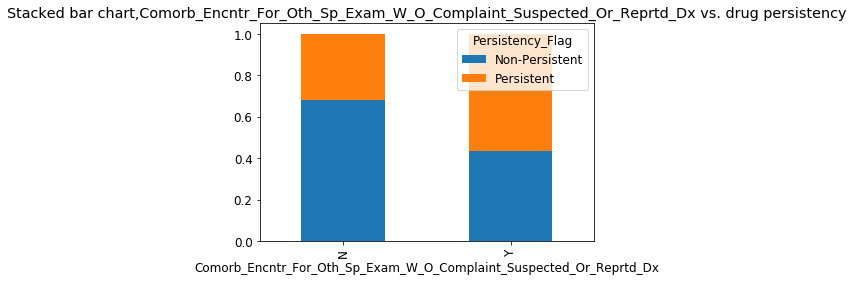

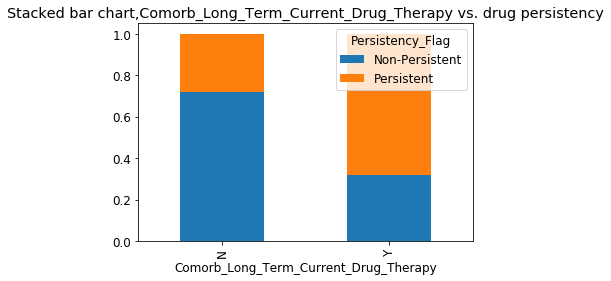

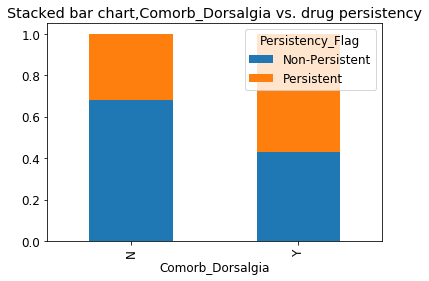

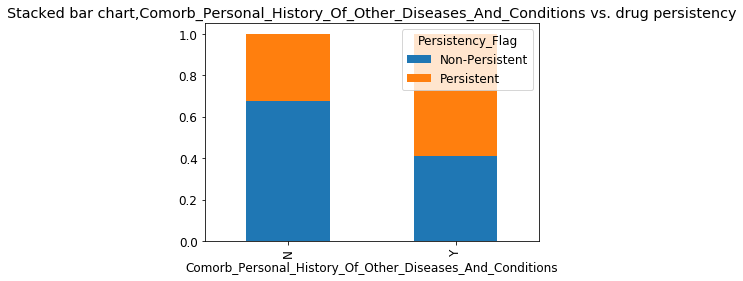

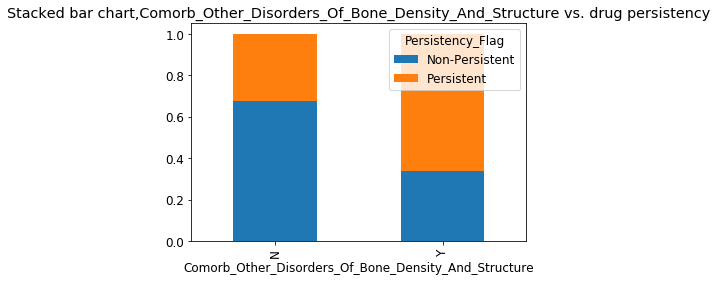

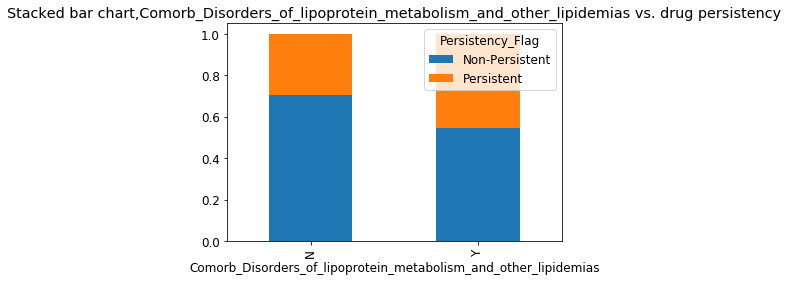

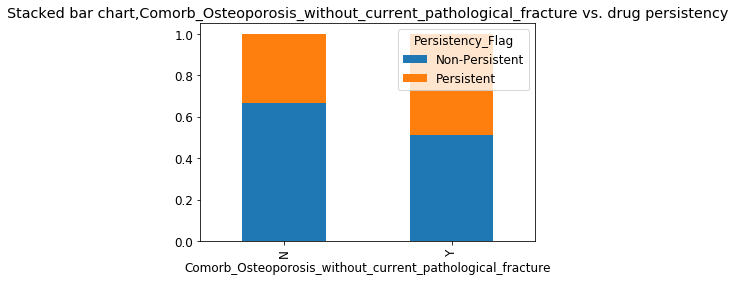

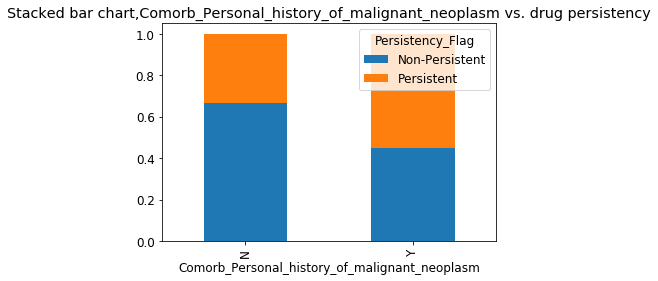

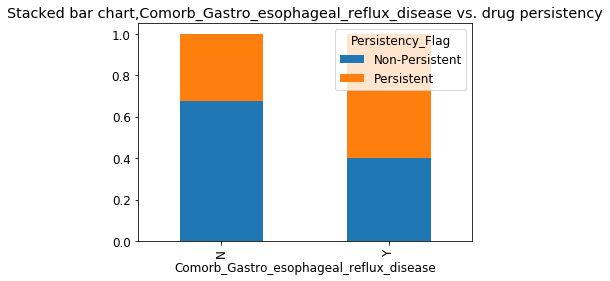

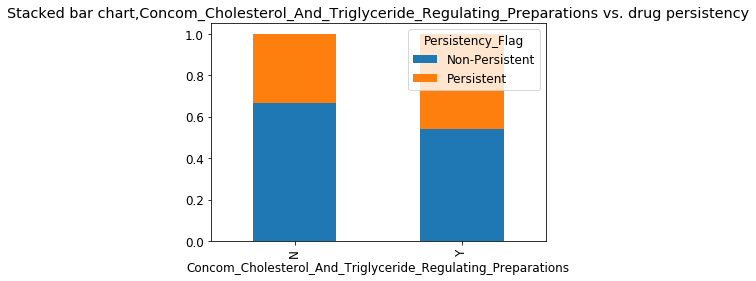

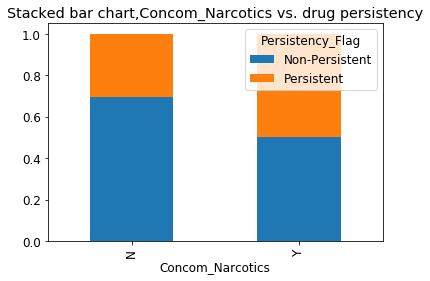

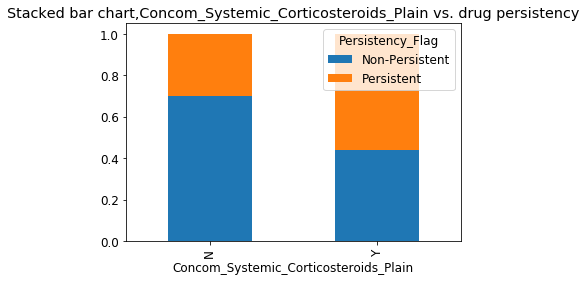

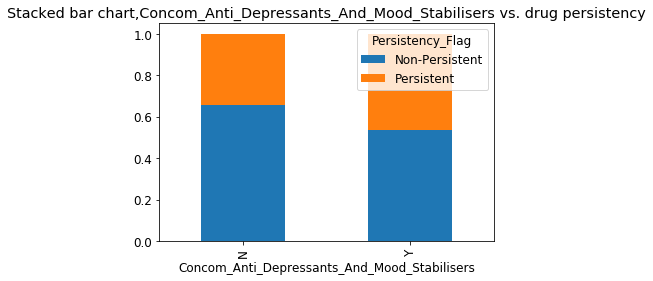

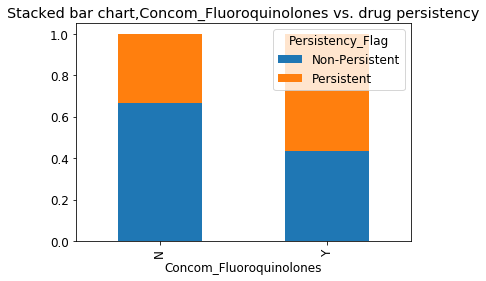

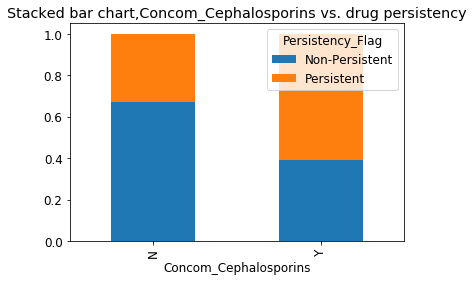

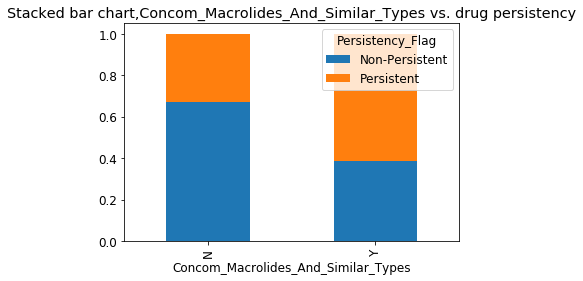

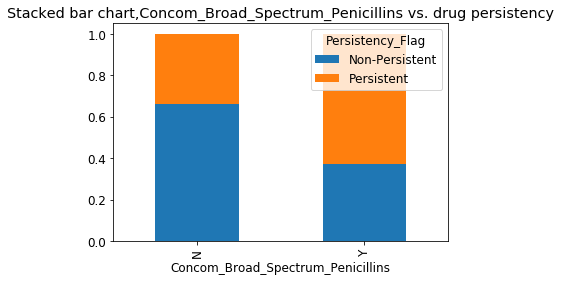

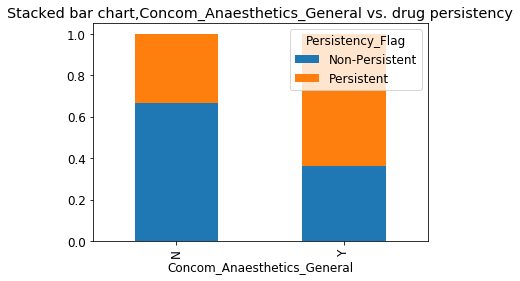

In [24]:
#look at indep vars in second clinical group in same manner

for item in clinical2:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')

N    3071
Y     353
Name: Concom_Viral_Vaccines, dtype: int64
---
N    3285
Y     139
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64
---
N    3421
Y       3
Name: Risk_Osteogenesis_Imperfecta, dtype: int64
---
N    3294
Y     130
Name: Risk_Rheumatoid_Arthritis, dtype: int64
---
N    3422
Y       2
Name: Risk_Untreated_Chronic_Hyperthyroidism, dtype: int64
---
N    3297
Y     127
Name: Risk_Untreated_Chronic_Hypogonadism, dtype: int64
---
N    3412
Y      12
Name: Risk_Untreated_Early_Menopause, dtype: int64
---
N    3168
Y     256
Name: Risk_Patient_Parent_Fractured_Their_Hip, dtype: int64
---
N    2780
Y     644
Name: Risk_Smoking_Tobacco, dtype: int64
---
N    2954
Y     470
Name: Risk_Chronic_Malnutrition_Or_Malabsorption, dtype: int64
---
N    3406
Y      18
Name: Risk_Chronic_Liver_Disease, dtype: int64
---
N    3066
Y     358
Name: Risk_Family_History_Of_Osteoporosis, dtype: int64
---
N    3382
Y      42
Name: Risk_Low_Calcium_Intake, dtype: int64
---
N    1788
Y    

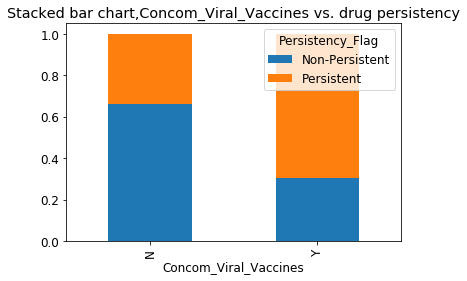

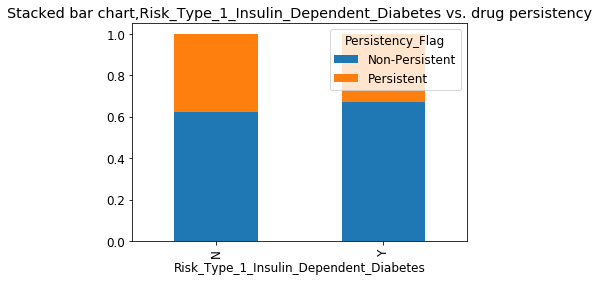

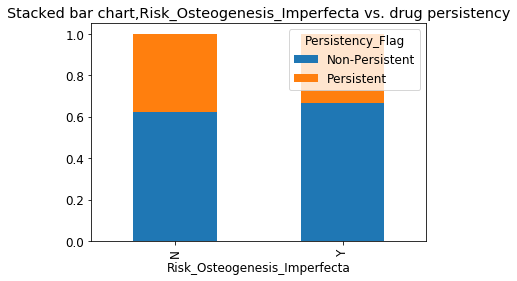

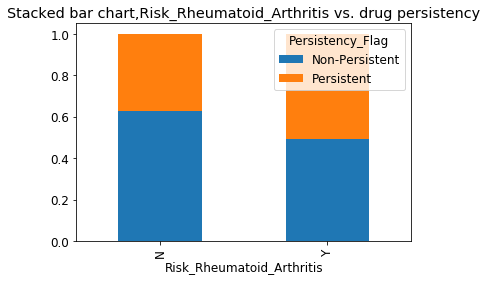

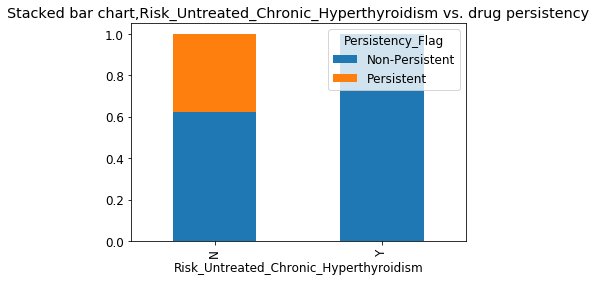

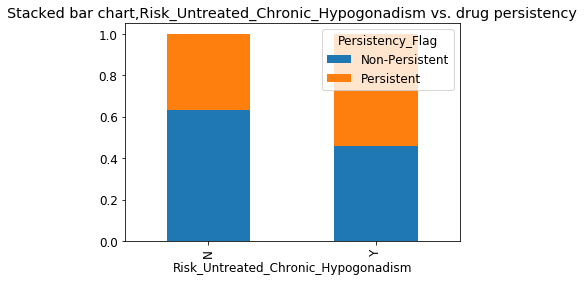

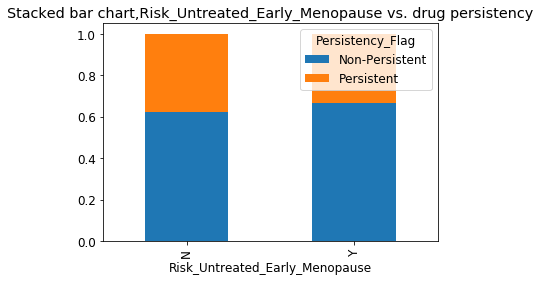

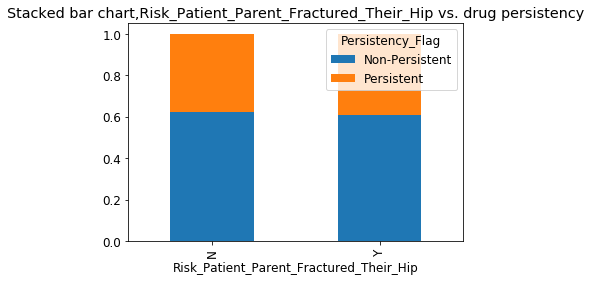

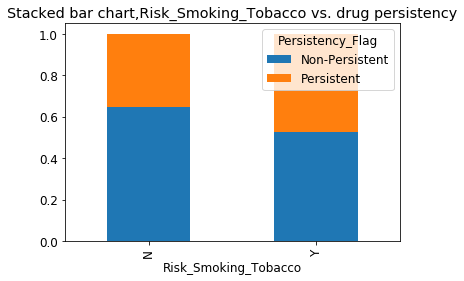

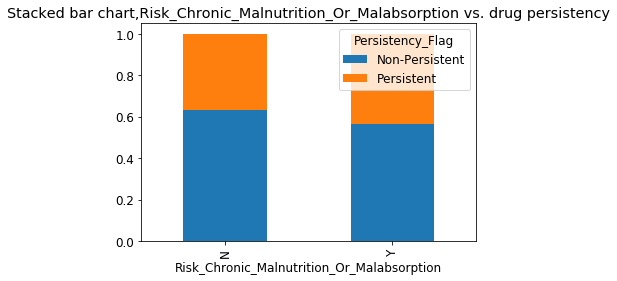

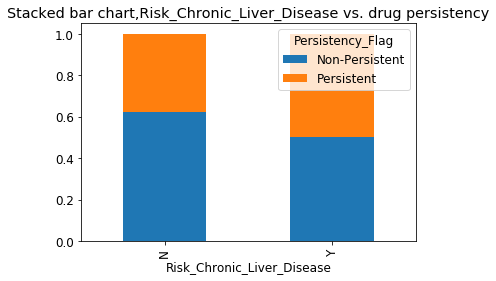

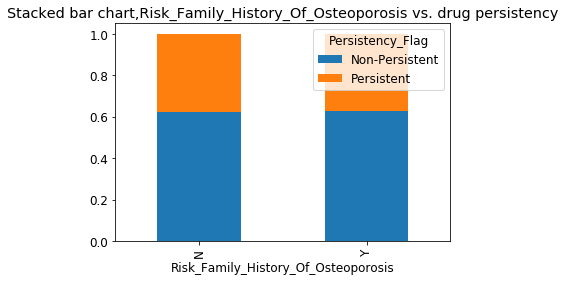

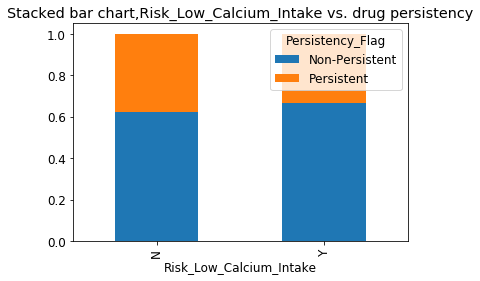

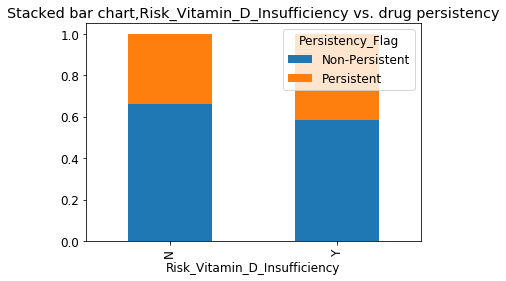

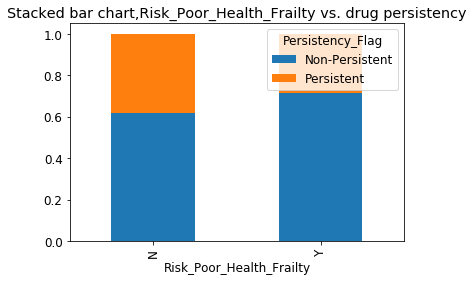

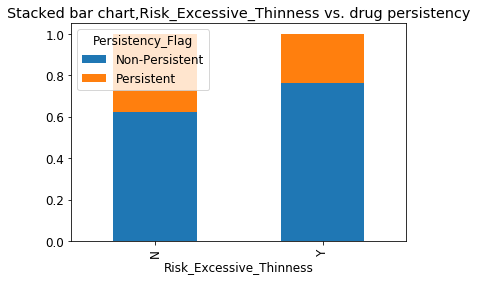

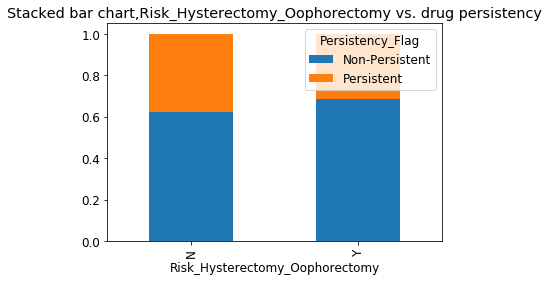

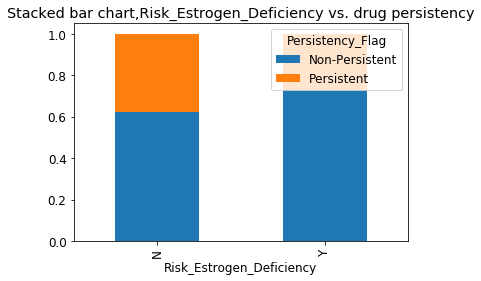

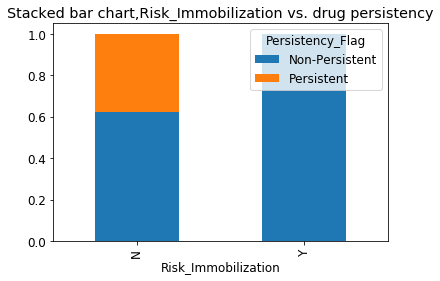

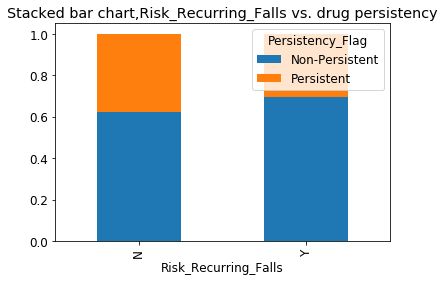

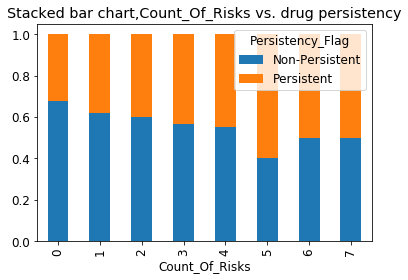

In [26]:
#do the same for the third clinical group

for item in clinical3:
    table = pd.crosstab(health[item], health.Persistency_Flag)
    table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = True)
    plt.title('Stacked bar chart,'+ item + ' vs. drug persistency')
    print(health[item].value_counts())
    print('---')